# Clasificación - Regresión Logística

In [1]:
# Librerías
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

from mglearn.plots import plot_2d_separator # pip install mglearn

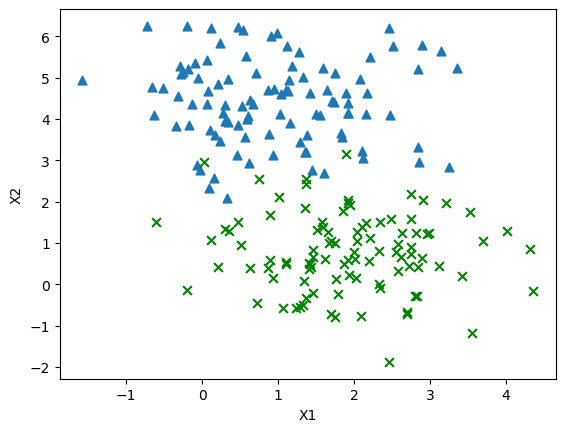

In [2]:
# Genero un dataset sintético
X, y = make_blobs(centers=2, random_state=0, n_samples=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="green", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

A continuación se dividen los datos en Train + Test y se entrena una regresión logística con los datos de Train. Posteriormente se predice Test. El modelo de regresión logística permite devolver probabilidades de cada clase (predict_proba) o la predicción de la clase como tal (predict). Suponiendo que una clase tenga Y=0 y la otra Y=1, puede devolver las probabilidades (probY0, probY1) o la predicción (Y0 o Y1). 

In [3]:
np.unique(y, return_counts=True)

(array([0, 1]), array([100, 100], dtype=int64))

In [4]:
# Divido el dataset en Train + Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                random_state=1234, stratify=y)

print(u'Dimensiones en train \n-X:{}\n-Y:{}'.format(X_train.shape, y_train.shape))
print(u'Dimensiones en test \n-X:{}\n-Y:{}'.format(X_test.shape, y_test.shape))

Dimensiones en train 
-X:(150, 2)
-Y:(150,)
Dimensiones en test 
-X:(50, 2)
-Y:(50,)


In [5]:
# Ajusto una regresión logística a Train
clf = LogisticRegression(verbose=1)

In [6]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [7]:
print(u'Parámetros de la logística \n- Interceptor: {}\
        \n- Coeficientes: {}'.format(clf.intercept_, clf.coef_))

Parámetros de la logística 
- Interceptor: [5.14609874]        
- Coeficientes: [[ 0.89634307 -2.62074832]]


In [8]:
np.exp(clf.coef_)

array([[2.45062494, 0.0727484 ]])

In [9]:
# Predigo el conjunto de Test
y_test_pred = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)

In [10]:
print(u'Ejemplo de predicción: {}'.format(y_test_prob[:3]))

Ejemplo de predicción: [[0.01425345 0.98574655]
 [0.99831548 0.00168452]
 [0.99739009 0.00260991]]


In [11]:
print("Probabilidad ", y_test_prob[0])

#      0             1
# [0.01425345   0.98574655]

print("Predicción ", y_test_pred[0])

Probabilidad  [0.01425345 0.98574655]
Predicción  1


In [12]:
print(u'Ejemplo de predicción: {}'.format(y_test_pred[:3]))

Ejemplo de predicción: [1 0 0]


A continuación se obtienen ciertas métricas utilizando las predicciones y los valores reales de y_test

In [13]:
# Obtengo métricas
auc = roc_auc_score(y_test, y_test_prob[:, 1])
print("- Precision:", round(precision_score(y_test, y_test_pred),2))
print("- Recall:", recall_score(y_test, y_test_pred))
print("- Fscore:", round(f1_score(y_test, y_test_pred),2))
print("- AUC:", round(auc,2))

- Precision: 0.96
- Recall: 0.88
- Fscore: 0.92
- AUC: 0.99


In [14]:
confusion_matrix(y_test, y_test_pred)

array([[24,  1],
       [ 3, 22]], dtype=int64)

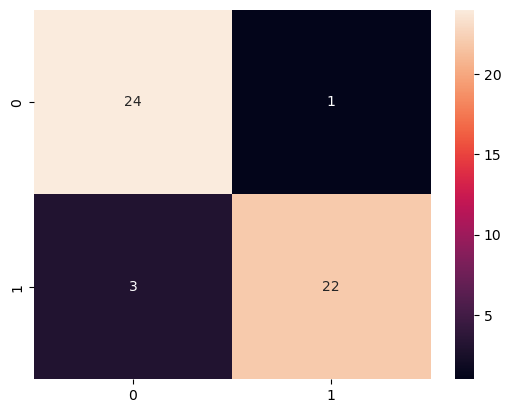

In [15]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True)
plt.show()

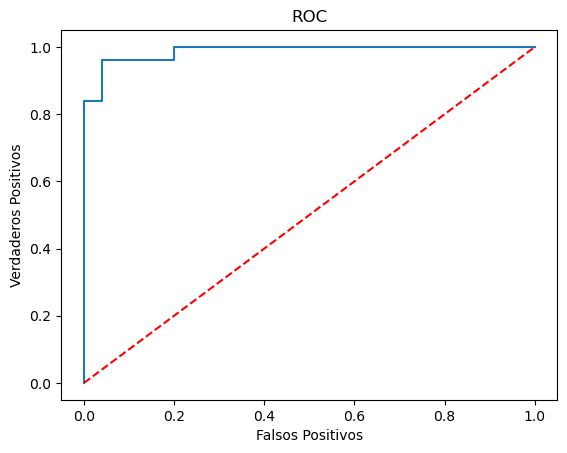

In [16]:
# Represento la ROC
fpr, tpr, thrs = roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

La curva ROC es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación. Otra forma de interpretarla es como la representación del ratio de verdaderos positivos frente al ratio de falsos positivos según se varía el umbral de discriminación, es decir el valor a partir del cual decidimos que un caso es un positivo

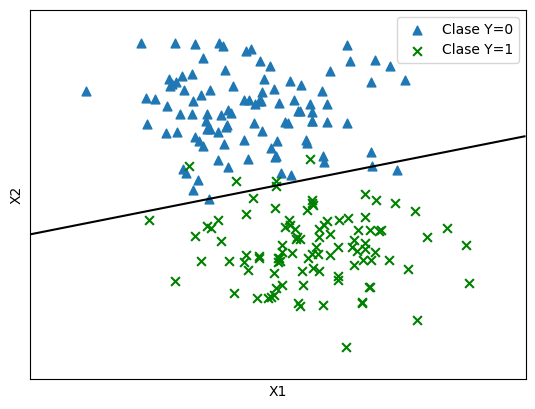

In [17]:
# Represento la frontera de decisión
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="green", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(loc="best")
plot_2d_separator(clf, X)
plt.show()